In [34]:
import random
import numpy as np
import collections
import copy
import os
import argparse
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt

is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()
def plot_rewards(rewards_all_episodes):
    plt.figure(1)
    rewards_t = np.array(rewards_all_episodes)
    plt.clf()
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.plot(rewards_t)
    # Take 100 episode averages and plot them too
    if len(rewards_t) >= 100:
        cumsum_vec = np.cumsum(np.insert(rewards_t, 0, 0)) 
        window_width = 100
        ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
        ma_vec = np.append(np.zeros(100),ma_vec)
        plt.plot(ma_vec)

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        display.display(plt.gcf())
        display.clear_output(wait=True)

def check_game(array):
    ar = np.append(np.sum(array,1),np.sum(array,0))
    ar = np.append(ar,[sum(np.diag(array)),sum(np.diag(np.fliplr(array)))])
    if 3 in ar:
        return 1
    elif -3 in ar:
        return -1
    elif 0 not in array:
        return 0.5
    else:
        return 0
class Game():
    
    def __init__(self,xo,q_table1 = None):
        self.array = np.array([[0,0,0],[0,0,0],[0,0,0]])
        self.xo = xo
        if self.xo==-1:
            m = random.randint(0,2)
            n = random.randint(0,2)
            self.array[m][n] = 1
        self.result = 0
        self.steps = 0
        self.q_table1 = q_table1
        if self.q_table1==None:
            self.rand = True
        else:
            self.rand = False
        
    def update(self,ind):
        self.steps+=1
        if self.array[(ind-1)//3][ind%3-1]==0:
            self.array[(ind-1)//3][ind%3-1] = self.xo
            if check_game(self.array)==0:
                if self.rand == False:
                    if str(self.array) in self.q_table1.keys(): 
                        ma = max(self.q_table1[str(self.array)].values())
                        action = random.choice([ind for ind,val in enumerate(self.q_table1[str(self.array)].values()) if val == ma])
                        m = (action)//3
                        n = action%3
                    else:
                       m = random.randint(0,2)
                       n = random.randint(0,2)
                else:
                    m = random.randint(0,2)
                    n = random.randint(0,2)
                while(self.array[m][n]!=0):
                    m = random.randint(0,2)
                    n = random.randint(0,2)
                self.array[m][n] = (self.xo*-1)
            self.result = check_game(self.array)
        else:
            if self.steps>10:
                self.result = -0.5
def set_reward(xo, result):
    reward = -0.1
    if result == 1:
        if xo==1:
            reward = 10
        else:
            reward = -10
    elif result == -1:
        if xo == -1:
            reward = 10
        else:
            reward = -10
    elif result == 0.5:
        reward = 2
    return reward

num_episodes = 50000
max_steps_per_episode = 100
learning_rate = 0.16
discount_rate = 0.95
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.0003

rewards_all_episodes = []
win_loss = []
q_table = dict()
q_table1 = None
for episode in range(num_episodes):
    if (1+episode)%10000==0:
        q_table1 = q_table
        print(episode)
    xo = [-1,1][random.randint(0,1)]
    game = Game(xo = xo, q_table1=q_table1)
    rewards_current_episode = 0
    for steps in range(max_steps_per_episode):
        state = np.copy(game.array)
        if str(state) not in q_table.keys(): 
            q_table[str(state)] = dict()
            for i in range(9):
                q_table[str(state)][(i)]= 0
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            ma = max(q_table[str(state)].values())
            action = random.choice([ind for ind,val in enumerate(q_table[str(state)].values()) if val == ma])
        else:
            action = random.randint(0,8)
        m = (action)//3
        n = action%3
        while(game.array[m][n]!=0):
            action = random.randint(0,8)
            m = (action)//3
            n = action%3
        game.update(action)
        next_state = np.copy(game.array)
        if str(next_state) not in q_table.keys(): 
            q_table[str(next_state)] = dict()
            for i in range(9):
                q_table[str(next_state)][(i)]= 0
        reward = set_reward(xo,game.result)
        q_table[str(state)][(action)] = q_table[str(state)][(action)]*(1-learning_rate) + learning_rate*(reward + discount_rate*max(q_table[str(next_state)].values()))
        rewards_current_episode += reward
        if game.result !=0:
            #plot_rewards(rewards_all_episodes)
            if reward==10:
                win_loss.append(1)
            else:
                win_loss.append(0)

            break
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)

        
            

9999
19999
29999
39999
49999


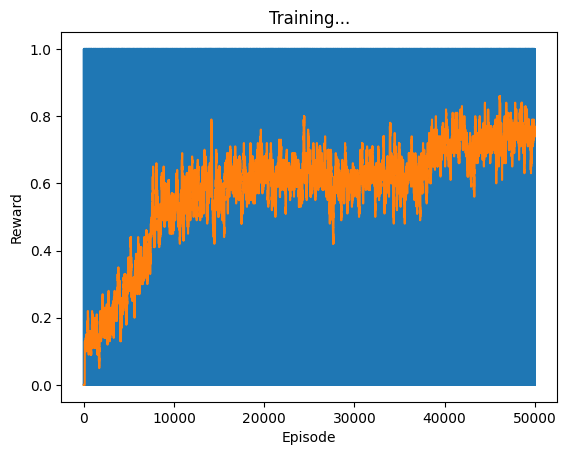

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [35]:
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()
def plot_rewards(rewards_all_episodes):
    plt.figure(1)
    rewards_t = np.array(rewards_all_episodes)
    plt.clf()
    plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.plot(rewards_t)
    # Take 100 episode averages and plot them too
    if len(rewards_t) >= 100:
        cumsum_vec = np.cumsum(np.insert(rewards_t, 0, 0)) 
        window_width = 100
        ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
        ma_vec = np.append(np.zeros(100),ma_vec)
        plt.plot(ma_vec)

    plt.pause(0.001)  # pause a bit so that plots are updated
    if is_ipython:
        display.display(plt.gcf())
plot_rewards(win_loss)

In [37]:
arr = np.array_split(rewards_all_episodes,10)
for i in arr:
    print(np.sum(i))
    #print(np.unique(i,return_counts=True))

-6699.400000000001
10945.2
20786.5
23011.9
23992.6
22942.899999999998
23805.8
25371.9
30122.199999999997
31537.8


In [36]:
# open file for writing, "w" 
f = open("q_table.txt","w")

# write json object to file
f.write(str(q_table))

# close file
f.close()

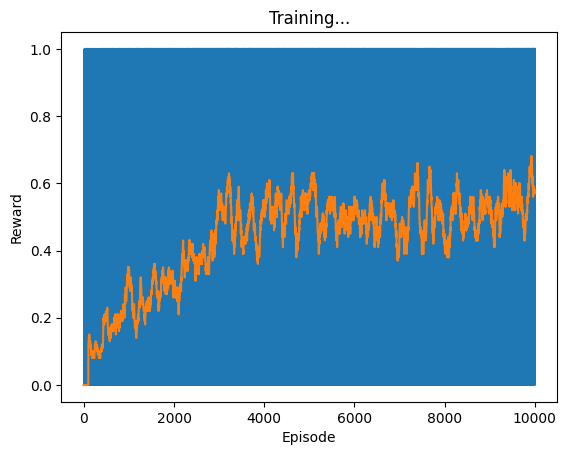

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
def set_reward(xo, result):
    reward = -0.1
    if result == 1:
        if xo==1:
            reward = 10
        else:
            reward = -10
    elif result == -1:
        if xo == -1:
            reward = 10
        else:
            reward = -10
    elif result == 0.5:
        reward = 2
    return reward

num_episodes = 10000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.85
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.0011